# Naive Bayes Classification: A Complete Guide

Welcome to your comprehensive introduction to **Naive Bayes classification**! This notebook will take you from zero knowledge to understanding one of the most elegant and effective machine learning algorithms.

## What You'll Learn
1. **Mathematical Foundation**: Bayes' theorem and probability concepts
2. **Algorithm Intuition**: How Naive Bayes makes predictions
3. **Types of Naive Bayes**: Gaussian, Multinomial, and Bernoulli variants
4. **Practical Implementation**: Real-world examples with code
5. **Advantages & Limitations**: When to use and when to avoid
6. **Performance Analysis**: Results on different datasets

---

## 1. Foundation: Bayes' Theorem

### What is Bayes' Theorem?

Imagine you're a doctor trying to diagnose a patient. You know:
- 1% of people have a rare disease
- A test is 95% accurate for detecting the disease
- The test gives false positives 10% of the time

If the test comes back positive, what's the probability the patient actually has the disease?

**Bayes' theorem helps us answer this!**

### The Formula

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

Where:
- **P(A|B)**: Probability of A given B (what we want to find)
- **P(B|A)**: Probability of B given A (likelihood)
- **P(A)**: Prior probability of A
- **P(B)**: Marginal probability of B

### In Machine Learning Context:

$$P(Class|Features) = \frac{P(Features|Class) \times P(Class)}{P(Features)}$$

**Translation**: 
- "Given these features, what's the probability of this class?"

In [2]:
# Setup and imports
import sys
import os
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, load_iris
from utils.data_utils import load_titanic_data
from utils.evaluation import ModelEvaluator

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("[START] Naive Bayes Classification Tutorial")
print("All libraries loaded successfully!")

[START] Naive Bayes Classification Tutorial
All libraries loaded successfully!


## 2. Algorithm Intuition: How Does Naive Bayes Think?

### Simple Example: Email Spam Detection

Let's say you want to classify emails as **Spam** or **Ham** (not spam).

**Training Data:**
- Spam emails often contain: "free", "money", "urgent"
- Ham emails often contain: "meeting", "family", "work"

**New Email**: "Get free money now!"

**Naive Bayes Process:**
1. **Calculate P(Spam)** and **P(Ham)** from training data
2. **For each word**, calculate:
   - P("free" | Spam) vs P("free" | Ham)
   - P("money" | Spam) vs P("money" | Ham)
3. **Multiply probabilities** (assumes independence - "naive")
4. **Compare** P(Spam | email) vs P(Ham | email)
5. **Choose** the higher probability

In [4]:
# Let's simulate the spam detection example
print("=== SPAM DETECTION EXAMPLE ===")
print()

# Simulated training data
training_data = {
    'Spam': ['free money now', 'get rich quick', 'urgent action required', 'free prize winner'],
    'Ham': ['meeting tomorrow', 'family dinner', 'work project', 'grocery shopping']
}

print("Training Data:")
for category, emails in training_data.items():
    print(f"{category}: {emails}")
print()

# New email to classify
new_email = "get free money"
print(f"New email to classify: '{new_email}'")
print()

# Calculate word frequencies
def count_words(emails):
    word_count = {}
    total_words = 0
    for email in emails:
        words = email.split()
        for word in words:
            word_count[word] = word_count.get(word, 0) + 1
            total_words += 1
    return word_count, total_words

spam_words, spam_total = count_words(training_data['Spam'])
ham_words, ham_total = count_words(training_data['Ham'])

print("Word frequencies in training data:")
print(f"Spam words: {spam_words}")
print(f"Ham words: {ham_words}")
print()

# Calculate probabilities
prior_spam = len(training_data['Spam']) / (len(training_data['Spam']) + len(training_data['Ham']))
prior_ham = 1 - prior_spam

print(f"Prior probabilities:")
print(f"P(Spam) = {prior_spam:.2f}")
print(f"P(Ham) = {prior_ham:.2f}")
print()

# Calculate likelihood for new email words
new_words = new_email.split()
print(f"Calculating likelihood for words: {new_words}")

spam_likelihood = 1
ham_likelihood = 1

for word in new_words:
    # With smoothing to avoid zero probabilities
    spam_prob = (spam_words.get(word, 0) + 1) / (spam_total + len(set(list(spam_words.keys()) + list(ham_words.keys()))))
    ham_prob = (ham_words.get(word, 0) + 1) / (ham_total + len(set(list(spam_words.keys()) + list(ham_words.keys()))))
    
    spam_likelihood *= spam_prob
    ham_likelihood *= ham_prob
    
    print(f"  P('{word}' | Spam) = {spam_prob:.4f}")
    print(f"  P('{word}' | Ham) = {ham_prob:.4f}")

print()
print(f"Combined likelihoods:")
print(f"P(words | Spam) = {spam_likelihood:.6f}")
print(f"P(words | Ham) = {ham_likelihood:.6f}")
print()

# Final classification
spam_posterior = spam_likelihood * prior_spam
ham_posterior = ham_likelihood * prior_ham

print(f"Final probabilities (unnormalized):")
print(f"P(Spam | email) ∝ {spam_posterior:.8f}")
print(f"P(Ham | email) ∝ {ham_posterior:.8f}")
print()

if spam_posterior > ham_posterior:
    print(f"[RESULT] Email classified as: SPAM")
else:
    print(f"[RESULT] Email classified as: HAM")


=== SPAM DETECTION EXAMPLE ===

Training Data:
Spam: ['free money now', 'get rich quick', 'urgent action required', 'free prize winner']
Ham: ['meeting tomorrow', 'family dinner', 'work project', 'grocery shopping']

New email to classify: 'get free money'

Word frequencies in training data:
Spam words: {'free': 2, 'money': 1, 'now': 1, 'get': 1, 'rich': 1, 'quick': 1, 'urgent': 1, 'action': 1, 'required': 1, 'prize': 1, 'winner': 1}
Ham words: {'meeting': 1, 'tomorrow': 1, 'family': 1, 'dinner': 1, 'work': 1, 'project': 1, 'grocery': 1, 'shopping': 1}

Prior probabilities:
P(Spam) = 0.50
P(Ham) = 0.50

Calculating likelihood for words: ['get', 'free', 'money']
  P('get' | Spam) = 0.0645
  P('get' | Ham) = 0.0370
  P('free' | Spam) = 0.0968
  P('free' | Ham) = 0.0370
  P('money' | Spam) = 0.0645
  P('money' | Ham) = 0.0370

Combined likelihoods:
P(words | Spam) = 0.000403
P(words | Ham) = 0.000051

Final probabilities (unnormalized):
P(Spam | email) ∝ 0.00020140
P(Ham | email) ∝ 0.0000

## 3. Why "Naive"?

The algorithm is called "naive" because it makes a **strong independence assumption**:

**Assumption**: All features are **conditionally independent** given the class.

### What does this mean?

In our spam example:
- It assumes that the word "free" appearing doesn't affect the probability of "money" appearing
- In reality, "free" and "money" often appear together in spam emails

### Why is this assumption useful?

1. **Simplifies calculation**: Instead of P(word1, word2, word3 | class), we calculate P(word1|class) × P(word2|class) × P(word3|class)
2. **Reduces data requirements**: We don't need to see every possible combination of features
3. **Fast training and prediction**: Linear time complexity
4. **Works surprisingly well**: Despite the "naive" assumption, often performs competitively

## 4. Types of Naive Bayes

Different types of Naive Bayes classifiers handle different types of data:

### 4.1 Gaussian Naive Bayes
- **Use case**: Continuous numerical features
- **Assumption**: Features follow a normal (Gaussian) distribution
- **Example**: Height, weight, temperature measurements

### 4.2 Multinomial Naive Bayes  
- **Use case**: Discrete count data
- **Assumption**: Features represent counts or frequencies
- **Example**: Word counts in text, number of occurrences

### 4.3 Bernoulli Naive Bayes
- **Use case**: Binary/boolean features
- **Assumption**: Features are binary (0 or 1, True or False)
- **Example**: Presence/absence of words, binary indicators

In [6]:
# 4.1 Gaussian Naive Bayes Example
print("=== GAUSSIAN NAIVE BAYES EXAMPLE ===")
print("Use case: Continuous numerical features (like Iris dataset)")
print()

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Gaussian Naive Bayes Accuracy: {accuracy:.3f}")
print()

# Show some predictions with probabilities
y_proba = gnb.predict_proba(X_test[:5])
print("Sample predictions with probabilities:")
for i in range(5):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[y_pred[i]]
    probs = y_proba[i]
    print(f"  Sample {i+1}: Actual={actual}, Predicted={predicted}")
    print(f"    Probabilities: {iris.target_names[0]}={probs[0]:.3f}, {iris.target_names[1]}={probs[1]:.3f}, {iris.target_names[2]}={probs[2]:.3f}")
    print()

=== GAUSSIAN NAIVE BAYES EXAMPLE ===
Use case: Continuous numerical features (like Iris dataset)

Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

Gaussian Naive Bayes Accuracy: 0.978

Sample predictions with probabilities:
  Sample 1: Actual=versicolor, Predicted=versicolor
    Probabilities: setosa=0.000, versicolor=0.996, virginica=0.004

  Sample 2: Actual=setosa, Predicted=setosa
    Probabilities: setosa=1.000, versicolor=0.000, virginica=0.000

  Sample 3: Actual=virginica, Predicted=virginica
    Probabilities: setosa=0.000, versicolor=0.000, virginica=1.000

  Sample 4: Actual=versicolor, Predicted=versicolor
    Probabilities: setosa=0.000, versicolor=0.975, virginica=0.025

  Sample 5: Actual=versicolor, Predicted=versicolor
    Probabilities: setosa=0.000, versicolor=0.832, virginica=0.168



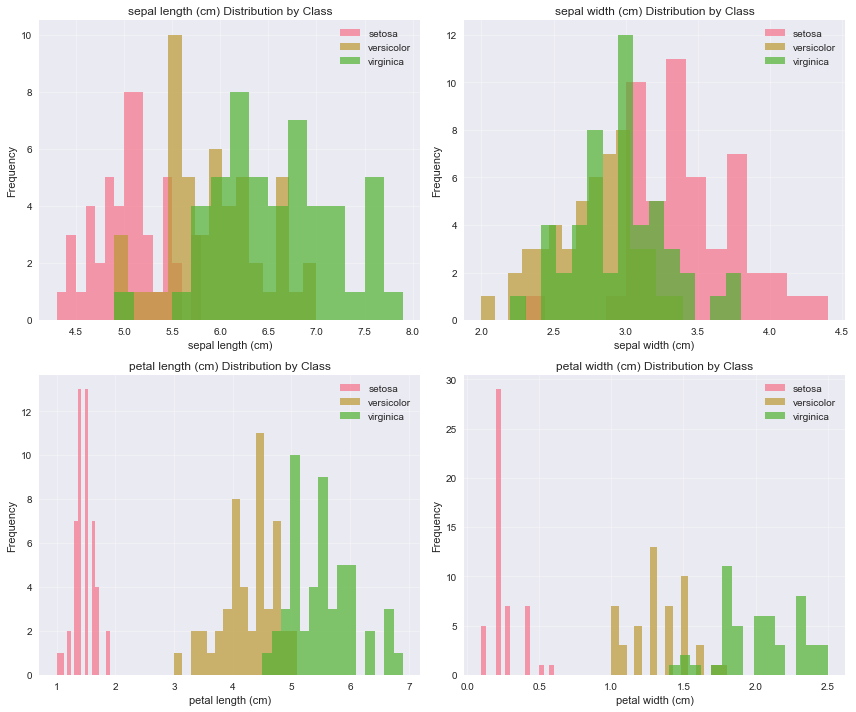

The plots show how Gaussian Naive Bayes assumes each feature follows
a normal distribution for each class. The algorithm learns the mean
and variance of each feature for each class.


In [7]:
# Visualize how Gaussian Naive Bayes sees the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Plot each feature's distribution by class
for i, feature_name in enumerate(iris.feature_names):
    ax = axes[i]
    
    for class_idx, class_name in enumerate(iris.target_names):
        class_data = X_iris[y_iris == class_idx, i]
        ax.hist(class_data, alpha=0.7, label=class_name, bins=15)
    
    ax.set_title(f'{feature_name} Distribution by Class')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The plots show how Gaussian Naive Bayes assumes each feature follows")
print("a normal distribution for each class. The algorithm learns the mean")
print("and variance of each feature for each class.")

In [8]:
# 4.2 Multinomial Naive Bayes Example
print("=== MULTINOMIAL NAIVE BAYES EXAMPLE ===")
print("Use case: Discrete count data (like word counts in text)")
print()

# Create synthetic text data with word counts
np.random.seed(42)

# Simulate document-term matrix (documents × words)
# Class 0: Technology articles (high counts for tech words)
# Class 1: Sports articles (high counts for sports words)

vocab = ['algorithm', 'computer', 'data', 'software', 'game', 'player', 'team', 'score']

# Technology articles - higher counts for tech words (indices 0-3)
tech_docs = np.random.poisson(3, (50, 4))  # Tech words
tech_docs = np.hstack([tech_docs, np.random.poisson(0.5, (50, 4))])  # Sports words

# Sports articles - higher counts for sports words (indices 4-7)
sports_docs = np.random.poisson(0.5, (50, 4))  # Tech words  
sports_docs = np.hstack([sports_docs, np.random.poisson(3, (50, 4))])  # Sports words

# Combine data
X_text = np.vstack([tech_docs, sports_docs])
y_text = np.hstack([np.zeros(50), np.ones(50)])

print(f"Text dataset shape: {X_text.shape}")
print(f"Vocabulary: {vocab}")
print(f"Classes: Technology (0), Sports (1)")
print()

# Show sample documents
print("Sample documents (word counts):")
for i in [0, 50]:  # One from each class
    class_name = "Technology" if y_text[i] == 0 else "Sports"
    print(f"  {class_name} document: {dict(zip(vocab, X_text[i]))}")
print()

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_text, y_text, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Multinomial Naive Bayes Accuracy: {accuracy:.3f}")
print()

# Show feature importance (log probabilities)
feature_log_prob = mnb.feature_log_prob_
print("Feature importance (log probabilities):")
print("Word\t\tTechnology\tSports")
for i, word in enumerate(vocab):
    print(f"{word:<12}\t{feature_log_prob[0, i]:.3f}\t\t{feature_log_prob[1, i]:.3f}")


=== MULTINOMIAL NAIVE BAYES EXAMPLE ===
Use case: Discrete count data (like word counts in text)

Text dataset shape: (100, 8)
Vocabulary: ['algorithm', 'computer', 'data', 'software', 'game', 'player', 'team', 'score']
Classes: Technology (0), Sports (1)

Sample documents (word counts):
  Technology document: {'algorithm': 4, 'computer': 1, 'data': 3, 'software': 3, 'game': 1, 'player': 0, 'team': 1, 'score': 1}
  Sports document: {'algorithm': 0, 'computer': 1, 'data': 0, 'software': 1, 'game': 1, 'player': 4, 'team': 3, 'score': 0}

Multinomial Naive Bayes Accuracy: 1.000

Feature importance (log probabilities):
Word		Technology	Sports
algorithm   	-1.623		-3.497
computer    	-1.546		-2.929
data        	-1.437		-2.998
software    	-1.589		-3.072
game        	-2.922		-1.526
player      	-3.535		-1.602
team        	-3.392		-1.715
score       	-3.461		-1.509


In [9]:
# 4.3 Bernoulli Naive Bayes Example
print("=== BERNOULLI NAIVE BAYES EXAMPLE ===")
print("Use case: Binary features (presence/absence of words)")
print()

# Convert the text data to binary (word present=1, absent=0)
X_binary = (X_text > 0).astype(int)

print(f"Binary text dataset shape: {X_binary.shape}")
print("Features now represent presence (1) or absence (0) of words")
print()

# Show sample documents
print("Sample documents (binary features):")
for i in [0, 50]:  # One from each class
    class_name = "Technology" if y_text[i] == 0 else "Sports"
    present_words = [vocab[j] for j in range(len(vocab)) if X_binary[i, j] == 1]
    print(f"  {class_name} document contains: {present_words}")
print()

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_text, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bernoulli Naive Bayes Accuracy: {accuracy:.3f}")
print()

# Show feature probabilities
feature_log_prob = bnb.feature_log_prob_
print("Feature probabilities (log P(word present | class)):")
print("Word\t\tTechnology\tSports")
for i, word in enumerate(vocab):
    print(f"{word:<12}\t{feature_log_prob[0, i]:.3f}\t\t{feature_log_prob[1, i]:.3f}")

=== BERNOULLI NAIVE BAYES EXAMPLE ===
Use case: Binary features (presence/absence of words)

Binary text dataset shape: (100, 8)
Features now represent presence (1) or absence (0) of words

Sample documents (binary features):
  Technology document contains: ['algorithm', 'computer', 'data', 'software', 'game', 'team', 'score']
  Sports document contains: ['computer', 'software', 'game', 'player', 'team']

Bernoulli Naive Bayes Accuracy: 0.967

Feature probabilities (log P(word present | class)):
Word		Technology	Sports
algorithm   	-0.121		-1.025
computer    	-0.090		-0.668
data        	-0.059		-0.573
software    	-0.121		-0.573
game        	-0.611		-0.053
player      	-1.253		-0.053
team        	-1.070		-0.026
score       	-1.476		-0.108


## 5. Real-World Application: Titanic Survival Prediction

Let's apply Gaussian Naive Bayes to predict Titanic passenger survival - a classic binary classification problem.

In [10]:
# Load Titanic dataset
print("=== TITANIC SURVIVAL PREDICTION ===")
print("Using Gaussian Naive Bayes for binary classification")
print()

X_train, X_test, y_train, y_test, feature_names = load_titanic_data()

print(f"Dataset shape: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")
print(f"Features: {feature_names}")
print(f"Classes: Died (0), Survived (1)")
print()

# Train model
nb_titanic = GaussianNB()
nb_titanic.fit(X_train, y_train)

# Make predictions
y_pred = nb_titanic.predict(X_test)
y_proba = nb_titanic.predict_proba(X_test)

# Evaluate performance
evaluator = ModelEvaluator("Naive Bayes - Titanic")
metrics = evaluator.evaluate_classification(y_test, y_pred, y_proba)

print(f"Performance Results:")
print(f"  Accuracy: {metrics['accuracy']:.3f}")
print(f"  Precision: {metrics['precision']:.3f}")
print(f"  Recall: {metrics['recall']:.3f}")
print(f"  F1-Score: {metrics['f1_score']:.3f}")
if metrics['auc_score']:
    print(f"  AUC Score: {metrics['auc_score']:.3f}")
print()

=== TITANIC SURVIVAL PREDICTION ===
Using Gaussian Naive Bayes for binary classification

Dataset shape: 712 training samples, 179 test samples
Features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
Classes: Died (0), Survived (1)

Performance Results:
  Accuracy: 0.810
  Precision: 0.740
  Recall: 0.783
  F1-Score: 0.761
  AUC Score: 0.839



In [11]:
# Analyze which features are most important for each class
print("=== FEATURE ANALYSIS ===")
print("How Naive Bayes sees each feature for survival prediction:")
print()

# Get the learned parameters
class_means = nb_titanic.theta_  # Mean of each feature for each class
class_vars = nb_titanic.sigma_   # Variance of each feature for each class

print("Average feature values by class:")
print("Feature\t\t\tDied (0)\tSurvived (1)\tDifference")
print("-" * 60)

for i, feature in enumerate(feature_names):
    died_mean = class_means[0, i]
    survived_mean = class_means[1, i]
    difference = survived_mean - died_mean
    print(f"{feature:<20}\t{died_mean:.3f}\t\t{survived_mean:.3f}\t\t{difference:+.3f}")

print()
print("Interpretation:")
print("  Positive difference = Feature increases survival probability")
print("  Negative difference = Feature decreases survival probability")

=== FEATURE ANALYSIS ===
How Naive Bayes sees each feature for survival prediction:



AttributeError: 'GaussianNB' object has no attribute 'sigma_'

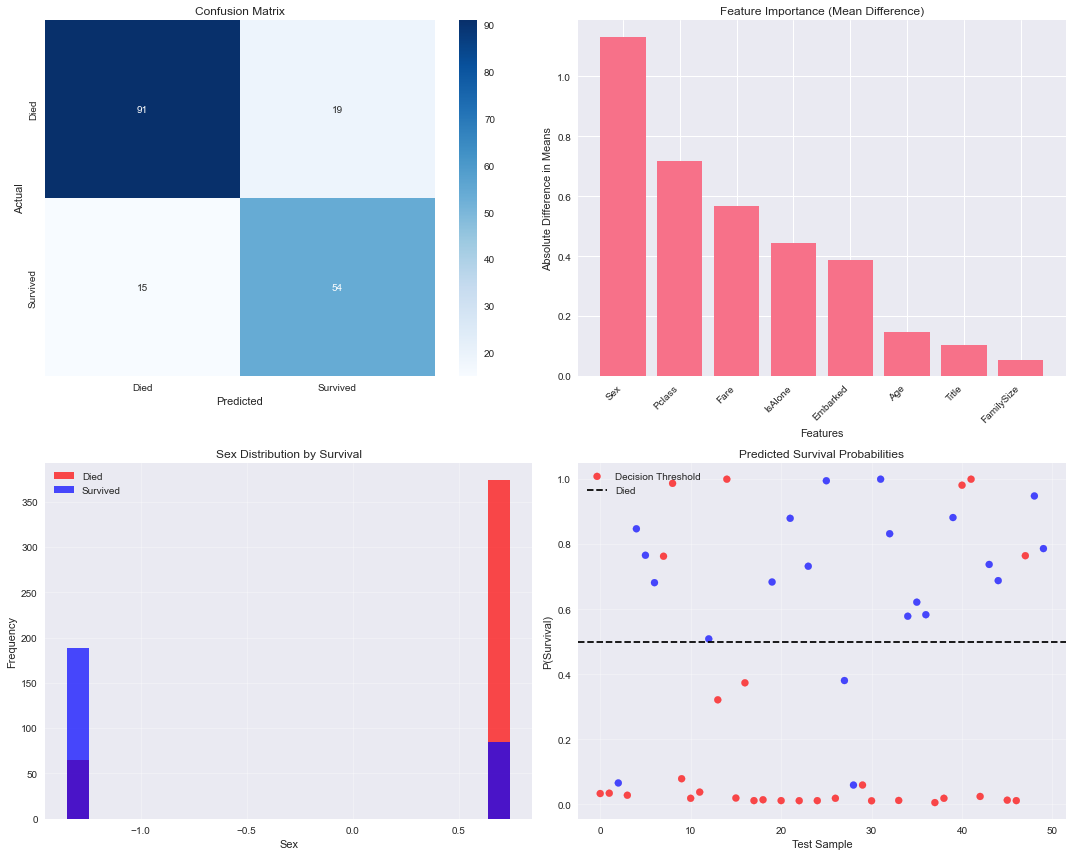

In [12]:
# Visualize the confusion matrix and feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix
ax1 = axes[0, 0]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Feature importance visualization
ax2 = axes[0, 1]
feature_importance = [abs(class_means[1, i] - class_means[0, i]) for i in range(len(feature_names))]
sorted_indices = sorted(range(len(feature_importance)), key=lambda i: feature_importance[i], reverse=True)

sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = [feature_importance[i] for i in sorted_indices]

ax2.bar(range(len(sorted_importance)), sorted_importance)
ax2.set_title('Feature Importance (Mean Difference)')
ax2.set_xlabel('Features')
ax2.set_ylabel('Absolute Difference in Means')
ax2.set_xticks(range(len(sorted_features)))
ax2.set_xticklabels(sorted_features, rotation=45, ha='right')

# Distribution of most important feature
ax3 = axes[1, 0]
most_important_idx = sorted_indices[0]
most_important_feature = feature_names[most_important_idx]

died_data = X_train[y_train == 0, most_important_idx]
survived_data = X_train[y_train == 1, most_important_idx]

ax3.hist(died_data, alpha=0.7, label='Died', bins=20, color='red')
ax3.hist(survived_data, alpha=0.7, label='Survived', bins=20, color='blue')
ax3.set_title(f'{most_important_feature} Distribution by Survival')
ax3.set_xlabel(most_important_feature)
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Probability distribution example
ax4 = axes[1, 1]
sample_probs = y_proba[:50, 1]  # Survival probabilities for first 50 test samples
colors = ['red' if actual == 0 else 'blue' for actual in y_test[:50]]

ax4.scatter(range(50), sample_probs, c=colors, alpha=0.7)
ax4.axhline(y=0.5, color='black', linestyle='--', label='Decision Threshold')
ax4.set_title('Predicted Survival Probabilities')
ax4.set_xlabel('Test Sample')
ax4.set_ylabel('P(Survival)')
ax4.legend(['Decision Threshold', 'Died', 'Survived'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Advantages and Limitations

### ✅ Advantages

1. **Simple and Fast**: Easy to understand and implement
2. **Small Data Friendly**: Works well with limited training data
3. **Handles Multiple Classes**: Naturally supports multi-class classification
4. **No Hyperparameter Tuning**: Few parameters to tune
5. **Good Baseline**: Often provides a strong baseline for comparison
6. **Probabilistic Output**: Provides probability estimates, not just classifications
7. **Handles Irrelevant Features**: Robust to irrelevant features
8. **Memory Efficient**: Low memory requirements

### ❌ Limitations

1. **Independence Assumption**: Features are rarely truly independent in real data
2. **Categorical Inputs**: Struggles with categorical inputs (needs preprocessing)
3. **Zero Probabilities**: Can assign zero probability if a feature value never appears with a class
4. **Limited Expressiveness**: Cannot capture complex feature interactions
5. **Gaussian Assumption**: Gaussian NB assumes normal distribution (may not hold)
6. **Bias**: Can be biased when classes are imbalanced

In [13]:
# Compare different types of Naive Bayes
print("=== COMPARING NAIVE BAYES VARIANTS ===")
print("Testing all three types on the same dataset")
print()

# Use the Titanic dataset for comparison
models = {
    'Gaussian NB': GaussianNB(),
    'Multinomial NB': MultinomialNB(),  # Note: Requires non-negative features
    'Bernoulli NB': BernoulliNB()
}

results = []

for name, model in models.items():
    try:
        # For Multinomial NB, we need non-negative features
        if name == 'Multinomial NB':
            # Scale features to be non-negative
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Model': name, 'Accuracy': accuracy})
        print(f"{name:<15}: {accuracy:.3f} accuracy")
        
    except Exception as e:
        print(f"{name:<15}: Failed - {str(e)[:50]}")

print()
print("Note: Different variants work better for different types of data:")
print("  - Gaussian: Best for continuous numerical features")
print("  - Multinomial: Best for count data (text analysis)")
print("  - Bernoulli: Best for binary features")

=== COMPARING NAIVE BAYES VARIANTS ===
Testing all three types on the same dataset

Gaussian NB    : 0.810 accuracy
Multinomial NB : 0.665 accuracy
Bernoulli NB   : 0.737 accuracy

Note: Different variants work better for different types of data:
  - Gaussian: Best for continuous numerical features
  - Multinomial: Best for count data (text analysis)
  - Bernoulli: Best for binary features


## 7. When to Use Naive Bayes

### 🎯 Perfect Use Cases

1. **Text Classification**: Email spam detection, sentiment analysis, document categorization
2. **Medical Diagnosis**: When you have symptom probabilities
3. **Real-time Prediction**: Fast inference needed
4. **Small Datasets**: Limited training data available
5. **Baseline Models**: Quick first attempt at a classification problem
6. **Multi-class Problems**: Naturally handles multiple classes

### ❌ Avoid When

1. **Strong Feature Correlations**: Features are highly dependent
2. **Need High Accuracy**: More sophisticated models likely to perform better
3. **Complex Relationships**: Non-linear relationships between features and classes
4. **Small Number of Features**: Other algorithms might be more suitable

### 🏆 Real-World Success Stories

- **Google's Gmail**: Uses Naive Bayes for spam detection
- **Netflix**: Early recommendation systems
- **Medical AI**: Diagnostic systems
- **E-commerce**: Product categorization

In [ ]:
# Final practical tips and code snippets
print("=== PRACTICAL TIPS FOR NAIVE BAYES ===")
print()

print("1. HANDLING ZERO PROBABILITIES:")
print("   Use Laplace smoothing (alpha parameter):")
print("   model = MultinomialNB(alpha=1.0)  # Default is 1.0")
print("   model = BernoulliNB(alpha=1.0)")
print()

print("2. FEATURE PREPROCESSING:")
print("   - Gaussian NB: Scale features if they have very different ranges")
print("   - Multinomial NB: Features must be non-negative")
print("   - Bernoulli NB: Convert to binary (0/1) features")
print()

print("3. HANDLING CATEGORICAL FEATURES:")
print("   Use label encoding or one-hot encoding before applying Naive Bayes")
print()

print("4. MODEL SELECTION:")
print("   - Use cross-validation to compare different NB variants")
print("   - Try different alpha values for smoothing")
print()

print("5. INTERPRETING RESULTS:")
print("   - Use predict_proba() for probability estimates")
print("   - Examine feature_log_prob_ to understand feature importance")
print("   - Check class_prior_ to see class distribution")
print()

# Demonstrate some of these tips
print("Example - Examining model parameters:")
print(f"Class priors: {nb_titanic.class_prior_}")
print(f"Classes: {nb_titanic.classes_}")
print(f"Number of features: {nb_titanic.n_features_in_}")

## 8. Summary and Key Takeaways

### 🎯 What You've Learned

1. **Mathematical Foundation**: Bayes' theorem and conditional probability
2. **Algorithm Mechanics**: How Naive Bayes makes predictions
3. **Three Variants**: Gaussian, Multinomial, and Bernoulli Naive Bayes
4. **Practical Implementation**: Real examples with code
5. **Strengths & Weaknesses**: When to use and when to avoid
6. **Best Practices**: Tips for successful implementation

### 🚀 Next Steps

1. **Practice**: Try Naive Bayes on your own datasets
2. **Compare**: Test against other algorithms (Logistic Regression, SVM, Random Forest)
3. **Feature Engineering**: Experiment with different feature representations
4. **Domain Application**: Apply to text classification or medical diagnosis problems
5. **Advanced Topics**: Learn about ensemble methods that combine Naive Bayes with other algorithms

### 💡 Key Insights

- **Simplicity is Powerful**: Despite being "naive", often performs surprisingly well
- **Speed Matters**: Fast training and prediction make it great for prototyping
- **Interpretability**: Easy to understand what the model learned
- **Probabilistic**: Provides confidence estimates, not just classifications
- **Foundation**: Understanding Naive Bayes helps with more advanced probabilistic models

---

**Congratulations!** You now understand one of the most fundamental and widely-used machine learning algorithms. Naive Bayes may be simple, but it's a powerful tool in your machine learning toolkit.

Remember: Sometimes the simplest solution is the best solution! 🎉